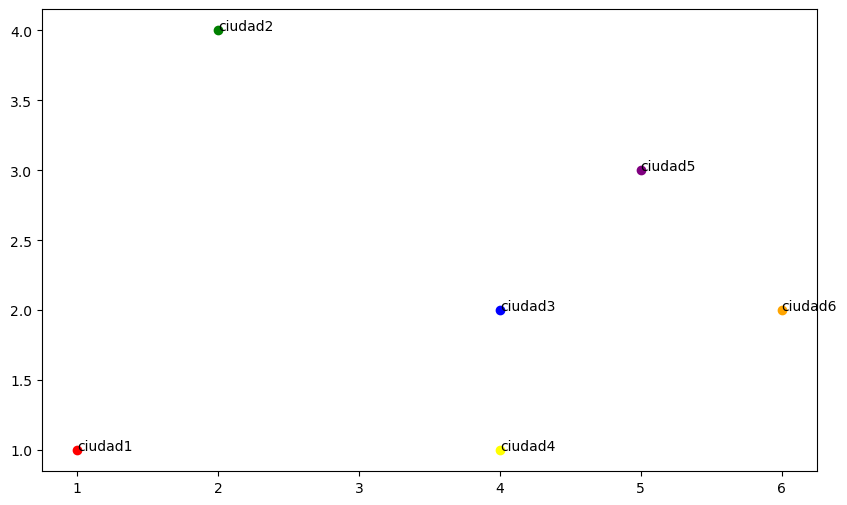

Distancias de Ciudades en km
[[0.  3.2 3.2 3.  4.5 5.1]
 [3.2 0.  2.8 3.6 3.2 4.5]
 [3.2 2.8 0.  1.  1.4 2. ]
 [3.  3.6 1.  0.  2.2 2.2]
 [4.5 3.2 1.4 2.2 0.  1.4]
 [5.1 4.5 2.  2.2 1.4 0. ]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

colores = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

def pintar_mapa_inicial(ciudades):
    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Inicializar la matriz de distancias
    num_ciudades = len(ciudades)
    distancias = np.zeros((num_ciudades, num_ciudades))

    # Calcular las distancias y añadir las líneas al gráfico
    for i in range(num_ciudades):
        for j in range(i+1, num_ciudades):
            # Calcular la distancia
            dx = ciudades[str(i+1)][0] - ciudades[str(j+1)][0]
            dy = ciudades[str(i+1)][1] - ciudades[str(j+1)][1]
            distancia = np.sqrt(dx**2 + dy**2)

            # Guardar la distancia en la matriz
            distancias[i, j] = distancia
            distancias[j, i] = distancia

            # Añadir la línea al gráfico
            # plt.plot(*zip(ciudades[str(i+1)], ciudades[str(j+1)]), color='grey')

    # Añadir cada ciudad al gráfico con su propio color
    for ciudad, coords in ciudades.items():
        plt.scatter(*coords, color=colores[int(ciudad)-1])
        plt.text(*coords, f"ciudad{ciudad}")

    # Mostrar el gráfico
    plt.show()

    # Redondear las distancias a un decimal
    distancias = np.around(distancias, 1)

    return distancias

ciudades = {
    '1': (1, 1),
    '2': (2, 4),
    '3': (4, 2),
    '4': (4, 1),
    '5': (5, 3),
    '6': (6, 2),
}

distancias = pintar_mapa_inicial(ciudades)
print("Distancias de Ciudades en km")
print(distancias)



In [2]:
def generar_poblacion(num_ciudades, num_individuos):
    # Generar una población de individuos
    poblacion = [random.sample(range(1, num_ciudades+1), num_ciudades) for _ in range(num_individuos)]
    return np.array(poblacion)

def calcular_distancia(individuo):
    camino = np.array(individuo)
    # Calcular la distancia total de un individuo
    distancia_total = sum(distancias[i-1][j-1] for i, j in zip(camino[:-1], camino[1:]))
    # Añadir la distancia entre el último y el primer elemento
    distancia_total += distancias[camino[-1]-1][camino[0]-1]
    return np.around(distancia_total, 1)



# Generar una población de 10 individuos
poblacion = generar_poblacion(len(ciudades), 6)
#poblacion = np.array([
#    [2, 1, 6, 3, 4, 5],
#    [1, 5, 6, 2, 4, 3],
#    [3, 6, 1, 4, 5, 2],
#    [2, 3, 4, 6, 5, 1],
#    [2, 3, 6, 1, 4, 5],
#    [2, 4, 3, 5, 6, 1],
#])
def print_generacion(generacion, title):
    print(title)
    # Calcular las distancias para cada individuo
    for individuo in generacion:
        distancia_total = calcular_distancia(individuo)
        print(f'Individuo: {individuo}, Distancia total: {distancia_total}')

print_generacion(poblacion, "Poblacion inicial")


Poblacion inicial
Individuo: [2 1 6 3 4 5], Distancia total: 16.7
Individuo: [1 5 6 2 4 3], Distancia total: 18.2
Individuo: [3 6 1 4 5 2], Distancia total: 18.3
Individuo: [2 3 4 6 5 1], Distancia total: 15.1
Individuo: [2 3 6 1 4 5], Distancia total: 18.3
Individuo: [2 4 3 5 6 1], Distancia total: 15.7


Graficas de la poblacion inicial
Grafica del camino:
[2 1 6 3 4 5]


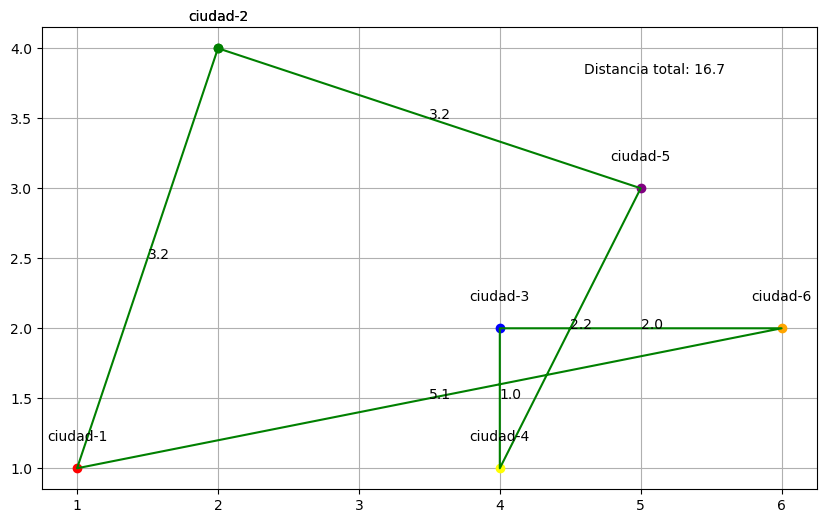

Grafica del camino:
[1 5 6 2 4 3]


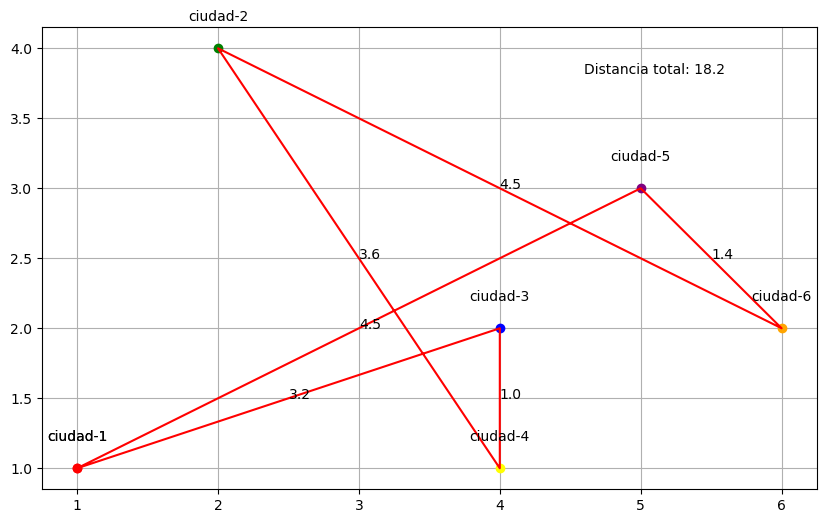

Grafica del camino:
[3 6 1 4 5 2]


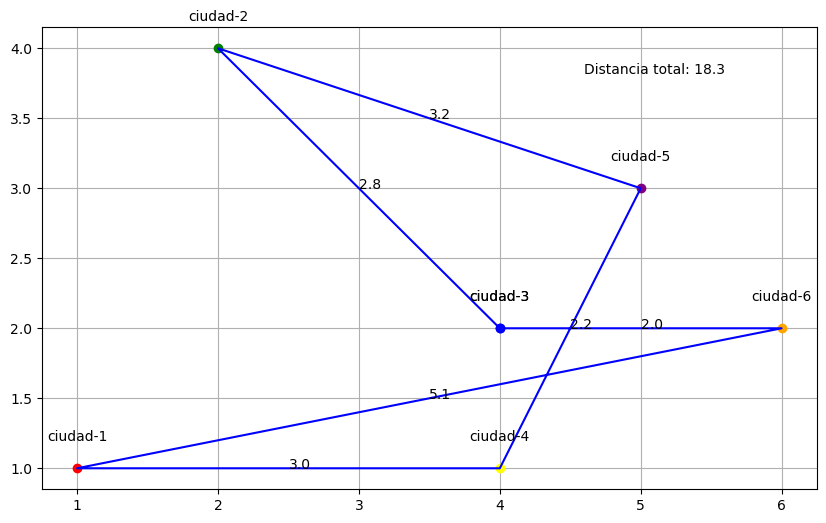

Grafica del camino:
[2 3 4 6 5 1]


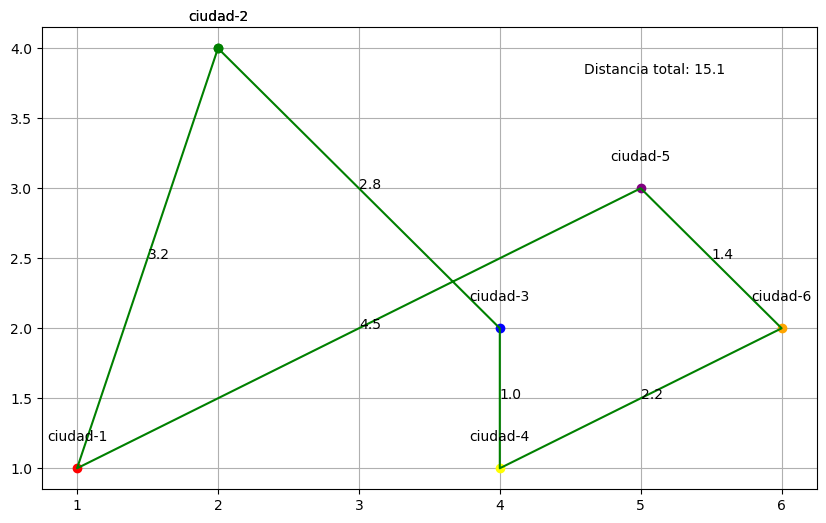

Grafica del camino:
[2 3 6 1 4 5]


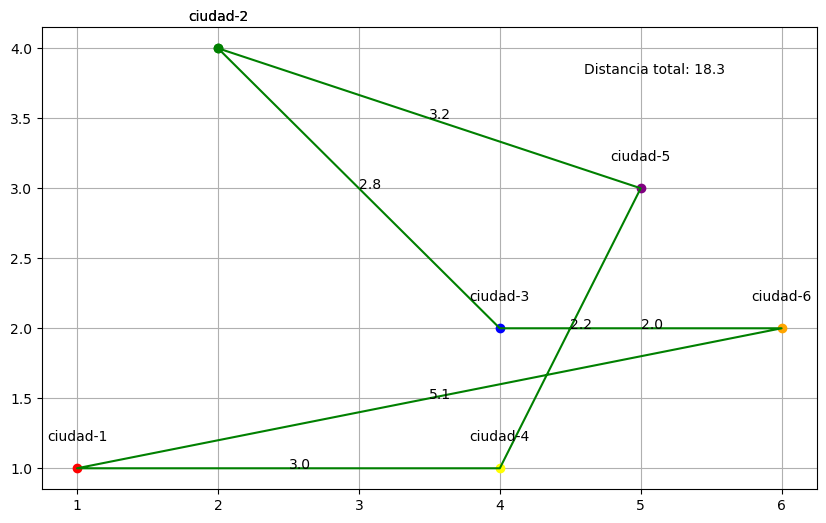

Grafica del camino:
[2 4 3 5 6 1]


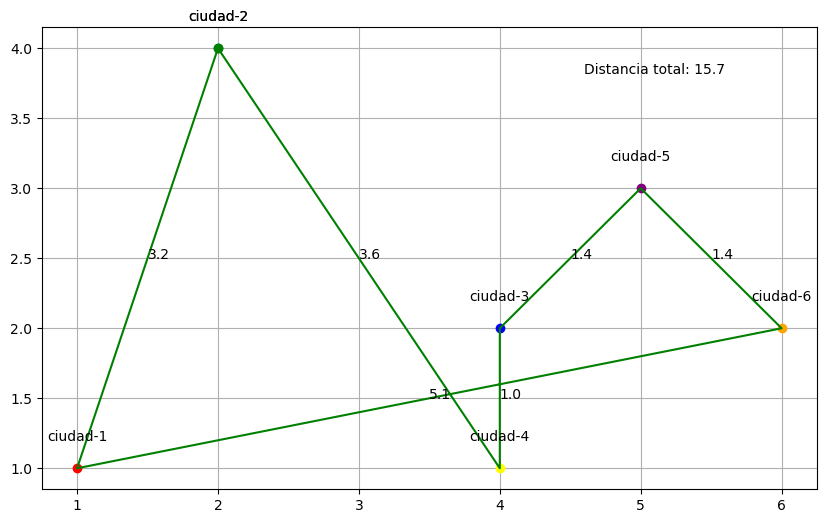

In [3]:

def graficar_camino(camino):    
    camino_original = [x for x in camino]
    print("Grafica del camino:")
    print(np.array(camino_original))
    
    # Añadir la primera ciudad al final del camino para cerrar el ciclo
    camino = np.append(camino, camino[0])
    
    # Crear listas para las coordenadas x e y
    x = []
    y = []
    
    # Llenar las listas de coordenadas con las ubicaciones de las ciudades en el camino
    for ciudad in camino:
        coordenadas = ciudades[str(ciudad)]
        x.append(coordenadas[0])
        y.append(coordenadas[1])
    
    # Crear un gráfico de las ciudades y el camino entre ellas
    plt.figure(figsize=(10, 6))
    
    # Definir colores para las ciudades
    
    
    # Dibujar las ciudades con colores distintos
    for i, ciudad in enumerate(camino):
        plt.plot(x[i], y[i], 'o', color=colores[ciudad-1])
    
    # Añadir las distancias al gráfico
    for i in range(len(camino) - 1):
        ciudad1 = camino[i] - 1
        ciudad2 = camino[i + 1] - 1
        distancia = distancias[ciudad1][ciudad2]
        plt.annotate(f'{distancia}', ((x[i] + x[i + 1]) / 2, (y[i] + y[i + 1]) / 2))
        
    # Añadir los nombres de las ciudades al gráfico
    for i in range(len(camino)):
        ciudad = camino[i]
        plt.annotate(f'ciudad-{ciudad}', (x[i], y[i]), textcoords="offset points", xytext=(0,20), ha='center')
    
    # Dibujar el camino en el color de la ciudad que inicia el camino
    plt.plot(x, y, '-', color=colores[camino[0]-1])
    
    distancia_total = calcular_distancia(camino)
    
    # Añadir la distancia total en la esquina del gráfico
    plt.text(0.70, 0.90, f'Distancia total: {distancia_total}', transform=plt.gca().transAxes)
    
    plt.grid(True)
    plt.show()
    
    
    
# Ejemplo de uso de la función


def graficar_generacion(generacion):
    for individuo in generacion:
        graficar_camino(individuo)

print("Graficas de la poblacion inicial")
graficar_generacion(poblacion)

In [8]:
def cruzar(individuo1, individuo2, prob_cruce=0.7):
    # Crear una copia del primer individuo para no modificar el original
    cruce = individuo1.copy()

    # Realizar el cruce
    if random.random() < prob_cruce:
        # El primer elemento del cruce es el primer elemento del primer individuo
        cruce[0] = individuo1[0]

        # Para los elementos intermedios
        for i in range(1, len(individuo1) - 1):
            # Obtener los vecinos del elemento anterior en el cruce
            vecinos = [individuo1[(i-2)%len(individuo1)], individuo1[(i)%len(individuo1)],
                       individuo2[(i-2)%len(individuo2)], individuo2[(i)%len(individuo2)]]
            # Ordenar los vecinos por distancia al elemento anterior en el cruce
            vecinos.sort(key=lambda x: distancias[cruce[i-1]-1][x-1])

            # Seleccionar el vecino que no está ya en el cruce
            for vecino in vecinos:
                if vecino not in cruce[:i]:
                    cruce[i] = vecino
                    break

        # El último elemento es la ciudad que no está en los elementos de cruce
        for ciudad in individuo1:
            if ciudad not in cruce[:-1]:
                cruce[-1] = ciudad
                break

        return cruce
    return None

def mutacion(individuo, prob_mutacion=0.09):
    # Crear una copia del camino para no modificar el original
    mutado = individuo.copy()
    if random.random() < prob_mutacion:        
        # Seleccionar dos puntos al azar, excluyendo el primer elemento
        punto1, punto2 = random.sample(range(1, len(mutado)), 2)
        # Realizar la mutación
        mutado[punto1], mutado[punto2] = mutado[punto2], mutado[punto1]
    return mutado

def seleccion_por_orden_lineal(generacion):
    # Calcular las distancias de todos los individuos en la generación
    distancias = np.array([calcular_distancia(individuo) for individuo in generacion])

    # Obtener los índices que ordenarían las distancias
    indices_ordenados = np.argsort(distancias)

    # Ordenar la generación utilizando los índices ordenados
    poblacion_ordenada = generacion[indices_ordenados]

    return poblacion_ordenada

def siguiente_generacion(generacion): 
    nueva_generacion = generacion.copy()
    generacion_ordenada = seleccion_por_orden_lineal(nueva_generacion) 
    for i in range(1, len(generacion_ordenada)-1):  # Cruza cada individuo con el siguiente en el orden
        hijo = cruzar(generacion_ordenada[i-1], generacion_ordenada[i])
        if hijo is not None:
            hijo = mutacion(hijo)            
            nueva_generacion = np.vstack([nueva_generacion, hijo])
    nueva_generacion = seleccion_por_orden_lineal(nueva_generacion)[:6]
    return nueva_generacion

def mejor_hijo(generacion):
    ordenado = seleccion_por_orden_lineal(generacion)
    return ordenado[0]

print_generacion(poblacion, "Pblacion inicial")

generacion = poblacion.copy()
best_solutions = []
best_solutions.append(mejor_hijo(generacion))
for i in range(1,11):    
    generacion = siguiente_generacion(generacion)
    print_generacion(generacion, f"Generacion {i}")
    best_solutions.append(mejor_hijo(generacion))

print("Mejores Soluciones")
for i in range(len(best_solutions)):
    if i > 0:
        print(f"Mejor Solucion Generacion {i+1}")
    else:
        print(f"Mejor Solucion Poblacion Inicial")
    distancia_total = calcular_distancia(np.array(best_solutions[i]))
    print(f'Camino: {best_solutions[i]}, Distancia total: {distancia_total}')



Pblacion inicial
Individuo: [2 1 6 3 4 5], Distancia total: 16.7
Individuo: [1 5 6 2 4 3], Distancia total: 18.2
Individuo: [3 6 1 4 5 2], Distancia total: 18.3
Individuo: [2 3 4 6 5 1], Distancia total: 15.1
Individuo: [2 3 6 1 4 5], Distancia total: 18.3
Individuo: [2 4 3 5 6 1], Distancia total: 15.7
Generacion 1
Individuo: [2 1 3 4 6 5], Distancia total: 14.2
Individuo: [2 3 6 5 4 1], Distancia total: 14.6
Individuo: [2 3 4 6 5 1], Distancia total: 15.1
Individuo: [2 4 3 5 6 1], Distancia total: 15.7
Individuo: [2 1 6 3 4 5], Distancia total: 16.7
Individuo: [1 5 6 2 4 3], Distancia total: 18.2
Generacion 2
Individuo: [2 1 3 4 6 5], Distancia total: 14.2
Individuo: [2 1 3 4 6 5], Distancia total: 14.2
Individuo: [2 3 6 5 4 1], Distancia total: 14.6
Individuo: [2 3 6 5 4 1], Distancia total: 14.6
Individuo: [2 3 4 6 5 1], Distancia total: 15.1
Individuo: [2 4 3 5 6 1], Distancia total: 15.7
Generacion 3
Individuo: [2 1 3 4 6 5], Distancia total: 14.2
Individuo: [2 1 3 4 6 5], Distan

Solucion Final
[2 5 6 3 4 1]
Grafica del camino:
[2 5 6 3 4 1]


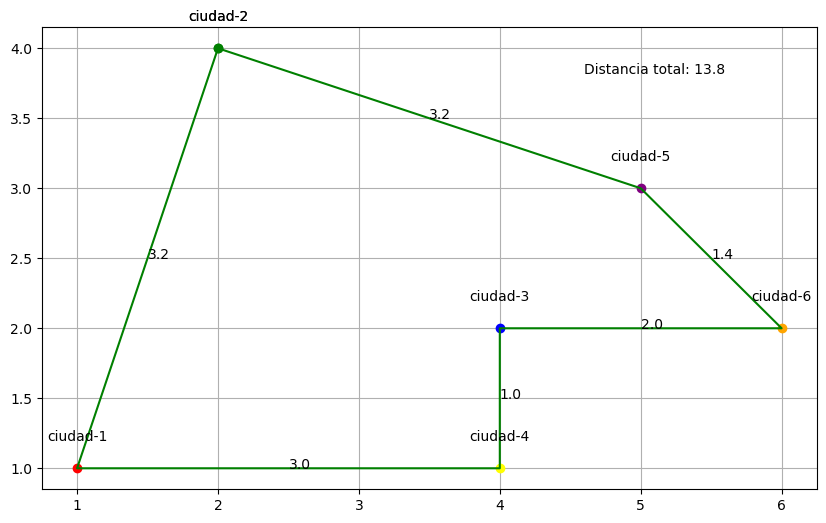

In [12]:
soluciones = np.array(best_solutions)
solucion_final = seleccion_por_orden_lineal(soluciones)[0]
print("Solucion Final")
print(solucion_final)
graficar_camino(solucion_final)

Soluciones Unicas
[[2 1 3 4 6 5]
 [2 3 4 6 5 1]
 [2 5 6 3 4 1]]
 
 
Grafica del camino:
[2 1 3 4 6 5]


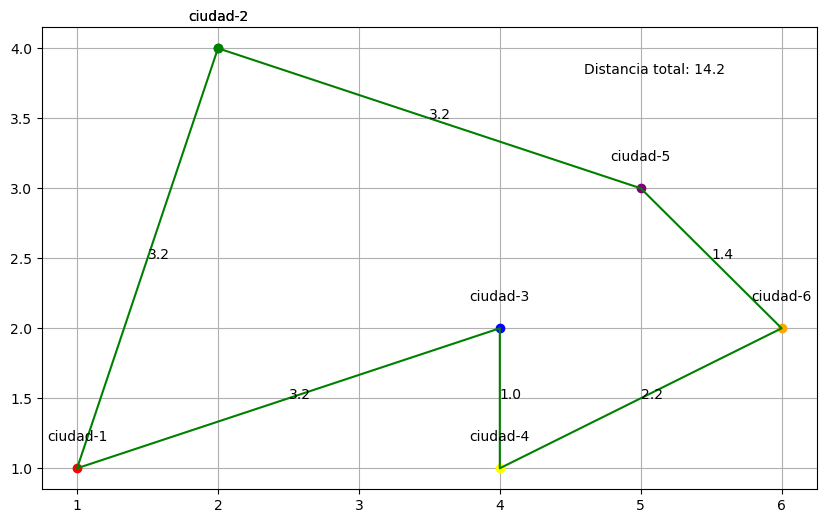

Grafica del camino:
[2 3 4 6 5 1]


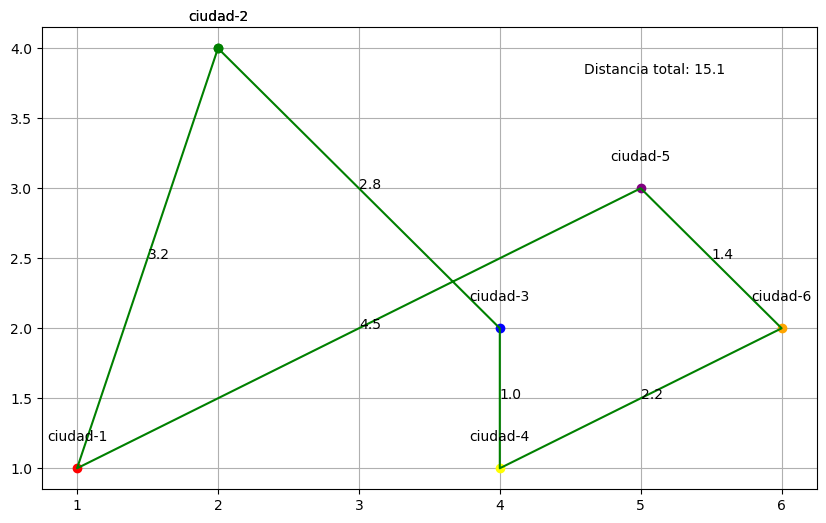

Grafica del camino:
[2 5 6 3 4 1]


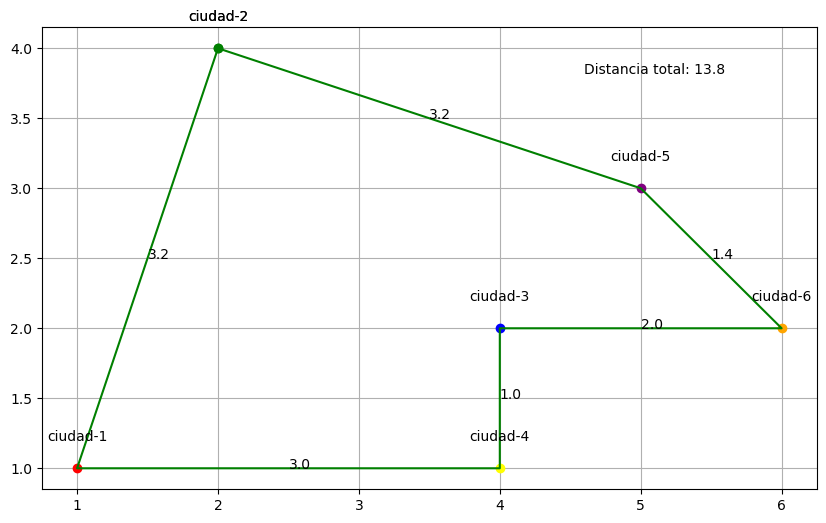

In [15]:
soluciones_unicas = np.unique(soluciones, axis=0)
print("Soluciones Unicas")
print(soluciones_unicas)
print(" ")
print(" ")
for solucion in soluciones_unicas:
    graficar_camino(solucion)